In [1]:
'''
https://www.kaggle.com/c/titanic/data

PassengerId     int64   : 탑승자 일련번호
Survived        int64   : 생존 여부( 0 = 사망 / 1 = 생존)
Pclass          int64   : 선실 등급 ( 1 = 일등석 / 2 = 이등석 / 3 = 삼등석)
Name            object  : 성별
Sex             object  : 이름
Age             float64 : 나이
SibSp           int64   : 같이 탑승한 형제/자매/배우자 인원수
Parch           int64   : 같이 탑승한 부모님/어린이 인원수
Ticket          object  : 티켓번호
Fare            float64 : 요금
Cabin           object  : 선실번호
Embarked        object  : 중간 정착 항구 ( C = Cherbourg, Q = Queenstown, S = Southampton)
dtypes: float64(2), int64(5), object(5)

'''



'\nhttps://www.kaggle.com/c/titanic/data\n\nPassengerId     int64   : 탑승자 일련번호\nSurvived        int64   : 생존 여부( 0 = 사망 / 1 = 생존)\nPclass          int64   : 선실 등급 ( 1 = 일등석 / 2 = 이등석 / 3 = 삼등석)\nName            object  : 성별\nSex             object  : 이름\nAge             float64 : 나이\nSibSp           int64   : 같이 탑승한 형제/자매/배우자 인원수\nParch           int64   : 같이 탑승한 부모님/어린이 인원수\nTicket          object  : 티켓번호\nFare            float64 : 요금\nCabin           object  : 선실번호\nEmbarked        object  : 중간 정착 항구 ( C = Cherbourg, Q = Queenstown, S = Southampton)\ndtypes: float64(2), int64(5), object(5)\n\n'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

print(tf.__version__)
tf.keras.backend.clear_session()

2.0.0


In [3]:

def change_null(data):
    # 결측지 제거
    data['Age'].fillna(data['Age'].mean(), inplace=True)
    data['Cabin'].fillna('N', inplace=True)
    data['Embarked'].fillna('N', inplace=True)
    return data


def encode_label(data):
    data['Cabin'] = data['Cabin'].str[:1]
    label_list = ['Cabin', 'Sex', 'Embarked']

    for label in label_list:
        data[label] = pd.Categorical(data[label])
        data[label] = data[label].cat.codes
    return data


def drop_data(data):
    data.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return data


def transform_data(data):
    data = change_null(data)
    data = encode_label(data)
    data = drop_data(data)
    return data


def get_change_age(age):
    if age <= 7:
        return 7
    elif age <= 12:
        return 12
    elif age <= 19:
        return 17
    elif age <= 29:
        return 20
    elif age <= 39:
        return 30
    elif age <= 49:
        return 40
    elif age <= 59:
        return 50
    elif age <= 69:
        return 60
    else:
        return 70

In [4]:
titanic_df = pd.read_csv("./titanic_data/train.csv")
titanic_test_df = pd.read_csv("./titanic_data/test.csv")
y_test_df = pd.read_csv("./titanic_data/gender_submission.csv")

print(titanic_df.head())
print(titanic_df.info())
print(titanic_df.isnull().sum())
print(titanic_df.info())


print("Sex : ", titanic_df['Sex'].value_counts())
print("Age : ", titanic_df['Age'].value_counts())
print("Cabin : ", titanic_df['Cabin'].value_counts())
print("Embarked : ", titanic_df['Embarked'].value_counts())
print(titanic_df.groupby(['Sex', 'Survived'])['Survived'].count())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

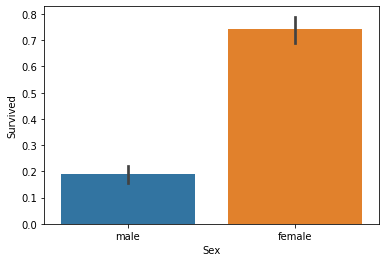

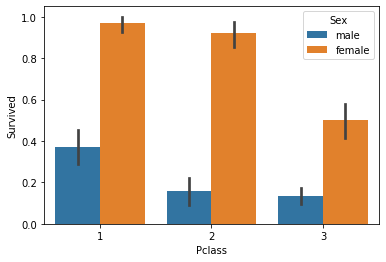

Age_ch  Survived
7       0            16
        1            34
12      0            13
        1             6
17      0            56
        1            39
20      0           143
        1            77
30      0            94
        1            73
40      0            55
        1            34
50      0            28
        1            20
60      0            13
        1             6
70      0           131
        1            53
Name: Survived, dtype: int64


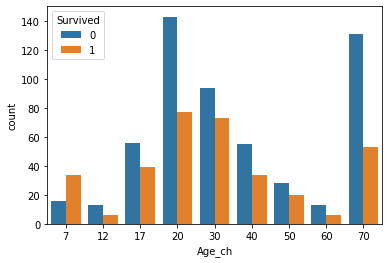

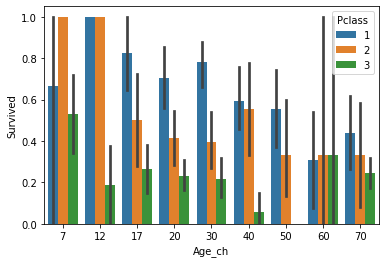

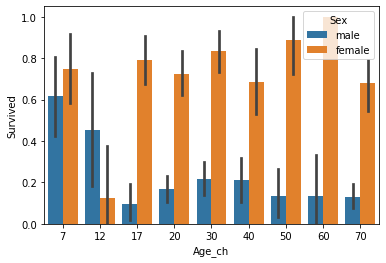

In [5]:
sns.barplot(x='Sex', y='Survived', data=titanic_df)
plt.show()
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)
plt.show()

titanic_df['Age_ch'] = titanic_df['Age'].apply(lambda x : get_change_age(x))
print(titanic_df.groupby(['Age_ch', 'Survived'])['Survived'].count())
sns.countplot(x='Age_ch',  hue='Survived',  data=titanic_df)
plt.show()
sns.barplot(x='Age_ch', y='Survived', hue='Pclass', data=titanic_df)
plt.show()
sns.barplot(x='Age_ch', y='Survived', hue='Sex', data=titanic_df)
plt.show()
titanic_df.drop('Age_ch', axis=1, inplace=True)

In [6]:
tf.keras.backend.set_floatx('float64')

tr_data = transform_data(titanic_df)
y_data = tr_data.pop('Survived')
test_data = transform_data(titanic_test_df)
test_y_data = y_test_df.pop('Survived')

dataset = tf.data.Dataset.from_tensor_slices((tr_data.values, y_data.values))
validate_data = dataset.shuffle(10000).batch(50).prefetch(1)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                90        
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1408      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257       
Total params: 34,779
Trainable params: 34,779
Non-trainable params: 0
_________________________________________________________________


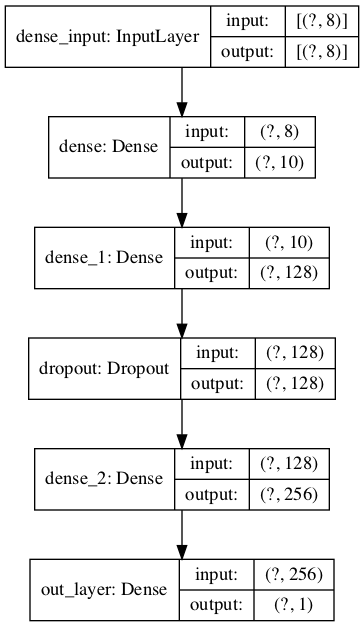

In [7]:

def get_compiled_model():

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(10, kernel_initializer='uniform', activation='relu', input_shape=(8,)))
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    # 커널을 랜덤한 직교 행렬로 초기화한 선형 활성화 층:
    # model.add(tf.keras.layers.Dense(64, kernel_initializer='orthogonal'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(256, activation='relu'))
    # model.add(tf.keras.layers.BatchNormalization())

    model.add(tf.keras.layers.Dense(1, activation='sigmoid', name='out_layer'))

    '''
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    inputs = keras.Input(shape=(784,), name='digits')
    x = layers.Dense(64, activation='relu', name='dense_1')(inputs)
    x = layers.Dense(64, activation='relu', name='dense_2')(x)
    outputs = layers.Dense(10, activation='softmax', name='predictions')(x)
    
    model.add(tf.keras.layers.Embedding(input_dim=1000, output_dim=256))
    model.add(tf.keras.layers.LSTM(128))
    
    model.compile(optimizer=tf.keras.optimizers.RMSprop(0.01),
                  loss=tf.keras.losses.binary_crossentropy,
                  metrics=[tf.keras.metrics.binary_crossentropy])
                  
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    '''

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.001, beta_2=0.999, amsgrad=False),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model


model = get_compiled_model()

model.summary()
tf.keras.utils.plot_model(model, 'my_titanic_model.png')
tf.keras.utils.plot_model(model, 'my_titanic_model_with_shape_info.png', show_shapes=True)


In [8]:
class LearningRateScheduler(tf.keras.callbacks.Callback):

  def __init__(self, schedule):
    super(LearningRateScheduler, self).__init__()
    self.schedule = schedule

  def on_epoch_begin(self, epoch, logs=None):
    if not hasattr(self.model.optimizer, 'lr'):
      raise ValueError('Optimizer must have a "lr" attribute.')

    lr = float(tf.keras.backend.get_value(self.model.optimizer.lr))
    scheduled_lr = self.schedule(epoch, lr)
    tf.keras.backend.set_value(self.model.optimizer.lr, scheduled_lr)
    print('\nEpoch %05d: Learning rate is %6.4f.' % (epoch, scheduled_lr))



LR_SCHEDULE = [
    (3, 0.05), (6, 0.01), (9, 0.005), (12, 0.001)
]

def lr_schedule(epoch, lr):
  if epoch < LR_SCHEDULE[0][0] or epoch > LR_SCHEDULE[-1][0]:
    return lr
  for i in range(len(LR_SCHEDULE)):
    if epoch == LR_SCHEDULE[i][0]:
      return LR_SCHEDULE[i][1]
  return lr

callbacks = [
  tf.keras.callbacks.EarlyStopping(patience=15, monitor='val_loss'),
  # tf.keras.callbacks.TensorBoard(log_dir='./logs')
  # LearningRateScheduler(lr_schedule)
]

In [9]:
model.fit(tr_data.values, y_data.values, batch_size=128, epochs=100, callbacks=callbacks,
          validation_data=validate_data)

model.evaluate(test_data.values, test_y_data.values, batch_size=10)

test_ds = tf.data.Dataset.from_tensor_slices((test_data.values, test_y_data.values)).batch(50).prefetch(1)
model.evaluate(test_ds, steps=3)

result = model.predict(test_ds)
# print(result)

json_string = model.to_json()
print(json_string)


Train on 891 samples, validate for 18 steps
Epoch 1/100
891/891 [==============================] - 1s 1ms/sample - loss: 0.6801 - accuracy: 0.5881 - val_loss: 0.6450 - val_accuracy: 0.6891
Epoch 2/100
891/891 [==============================] - 0s 156us/sample - loss: 0.6320 - accuracy: 0.6723 - val_loss: 0.6159 - val_accuracy: 0.6880
Epoch 3/100
891/891 [==============================] - 0s 115us/sample - loss: 0.6099 - accuracy: 0.6768 - val_loss: 0.6015 - val_accuracy: 0.6835
Epoch 4/100
891/891 [==============================] - 0s 114us/sample - loss: 0.6082 - accuracy: 0.6790 - val_loss: 0.5995 - val_accuracy: 0.6902
Epoch 5/100
891/891 [==============================] - 0s 151us/sample - loss: 0.6020 - accuracy: 0.6689 - val_loss: 0.5902 - val_accuracy: 0.7059
Epoch 6/100
891/891 [==============================] - 0s 117us/sample - loss: 0.5963 - accuracy: 0.7003 - val_loss: 0.5895 - val_accuracy: 0.6902
Epoch 7/100
891/891 [==============================] - 0s 117us/sample - los

In [11]:
# 가중치를 HDF5 파일로 저장합니다.
model.save_weights('my_titanic_model.h5', save_format='h5')
# 모델의 상태를 복원합니다.
model.load_weights('my_titanic_model.h5')
# 가중치와 옵티마이저를 포함하여 정확히 같은 모델을 다시 만듭니다.
# model = tf.keras.models.load_model('my_titanic_model.h5')
